In [2]:
#!pip install faker

In [3]:
import pandas as pd
import random
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

#1.Using Python libraries or synthetic data generation techniques, gathering relevant vendor data, purchase history, and product demand data. Ensure the data is in a suitable format for analysis.

In [127]:
category_to_products = {
    'Fruits': ['Apple', 'Banana', 'Orange'],
    'Vegetables': ['Broccoli', 'Carrots', 'Tomato', 'Onion'],
    'Meat': ['Chicken', 'Beef', 'Pork'],
    'Dairy': ['Milk', 'Cheese', 'Egg']
}

In [128]:
# Initialize the Faker instance
fake = Faker()

In [129]:
# Generate Synthetic Vendor Data
def generate_vendor_data(num_vendors, product_ids):
    vendors = []
    for vendor_id in range(1, num_vendors + 1):
        vendor = {
            'VendorID': vendor_id,
            'VendorName': fake.company(),
            'ContactName': fake.name(),
            'Email': fake.email(),
            'Phone': fake.phone_number(),
            'Address': fake.address(),
            'ProductID': random.choice(product_ids)
        }
        vendors.append(vendor)
    return pd.DataFrame(vendors)

In [124]:
# Generate Synthetic Purchase History Data
# def generate_purchase_history(num_purchases, product_ids):
#     purchases = []
#     for purchase_id in range(1, num_purchases + 1):
#         product_id = random.choice(product_ids)
#         purchase = {
#             'PurchaseID': purchase_id,
#             'PurchaseDate': fake.date_between(start_date='-1y', end_date='today'),
#             'ProductID': product_id,
#             'Quantity': random.randint(1, 100),
#             'Price': round(random.uniform(1, 100), 2)
#         }
#         purchases.append(purchase)
#     return pd.DataFrame(purchases)

def generate_purchase_history(num_purchases, product_ids):
    purchases = []
    for purchase_id in range(1, num_purchases + 1):
        product_id = random.choice(product_ids)
        purchase = {
            'PurchaseID': purchase_id,
            'PurchaseDate': fake.date_between(start_date='-1y', end_date='today'),
            'ProductID': product_id,
            'Quantity': random.randint(1, 100),
            'Price': round(random.uniform(1, 100), 2),
            'ProductQualityFlag': random.choice([0, 1])  # 0 indicates not good, 1 indicates good
        }
        purchases.append(purchase)
    return pd.DataFrame(purchases)

In [130]:
# Generate product data
product_data = []
for category, products in category_to_products.items():
    for product in products:
        product_data.append({
            'ProductID': len(product_data) + 1,  # Auto-incrementing product ID
            'ProductName': product,
            'Category': category
        })
# Create a DataFrame for product demand data
products_df = pd.DataFrame(product_data)

In [131]:
products_df.head()

,ProductID,ProductName,Category
0,1,Apple,Fruits
1,2,Banana,Fruits
2,3,Orange,Fruits
3,4,Broccoli,Vegetables
4,5,Carrots,Vegetables


In [132]:
# Function to generate product demand data
def generate_product_demand(num_entries, product_ids):
    product_demand = []
    for entry_id in range(1, num_entries + 1):
        product_id = random.choice(product_ids)
        demand_entry = {
            'EntryID': entry_id,
            'ProductID': product_id,
            'DemandQuantity': random.randint(1, 100)
        }
        product_demand.append(demand_entry)
    return pd.DataFrame(product_demand)

In [133]:
# Generate vendor data, purchase history, and product demand data
num_vendors = 10  # Number of vendors
num_purchases = 100  # Number of purchases
num_product_demand_entries = 200  # Number of product demand entries

In [134]:
# Generate the data
vendor_data = generate_vendor_data(num_vendors, products_df['ProductID'])
purchase_history_data = generate_purchase_history(num_purchases, products_df['ProductID'])
product_demand_data = generate_product_demand(num_product_demand_entries, products_df['ProductID'])

In [135]:
vendor_data.head()

,VendorID,VendorName,ContactName,Email,Phone,Address,ProductID
0,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",4
1,2,"Rogers, Dominguez and Ross",Isaac Booth,bsantiago@example.org,+1-358-995-0587x274,USCGC Mcknight\nFPO AA 34773,13
2,3,Webb-Ford,Karen Montgomery,katherine75@example.net,001-758-543-6432x15068,"400 Brock Keys\nNew Jonathan, MT 42395",5
3,4,Melton and Sons,Sean Rodriguez,danieljill@example.com,(888)332-9162x075,"38648 Linda Underpass\nWest Williamfort, IA 91253",6
4,5,"Hernandez, Curtis and Booth",Michelle Lynn,hoffmanandrew@example.org,832.609.0459,"43361 Randall Ways\nJacksontown, ND 02693",11


In [136]:
vendor_data.shape

(10, 7)

In [137]:
purchase_history_data.shape

(100, 6)

In [138]:
purchase_history_data.head()

,PurchaseID,PurchaseDate,ProductID,Quantity,Price,ProductQualityFlag
0,1,2023-05-14,4,55,60.95,1
1,2,2023-01-31,11,78,74.02,0
2,3,2023-05-22,3,46,80.57,0
3,4,2023-10-07,7,4,26.70,1
4,5,2023-09-06,2,26,5.87,1


In [139]:
product_demand_data.shape

(200, 3)

In [140]:
product_demand_data.head()

,EntryID,ProductID,DemandQuantity
0,1,7,42
1,2,9,74
2,3,8,92
3,4,1,52
4,5,8,74


In [141]:
# Merge the product_demand_data with products_df to add 'ProductName' and 'Category' columns
product_demand_data = pd.merge(product_demand_data, products_df[['ProductID', 'ProductName', 'Category']], on='ProductID')

# Display the updated product_demand_data DataFrame
print(product_demand_data)


     EntryID  ProductID  DemandQuantity ProductName    Category
0          1          7              42       Onion  Vegetables
1          7          7              11       Onion  Vegetables
2         23          7              88       Onion  Vegetables
3         28          7              87       Onion  Vegetables
4         29          7              48       Onion  Vegetables
..       ...        ...             ...         ...         ...
195      151          2              52      Banana      Fruits
196      157          2              13      Banana      Fruits
197      158          2               7      Banana      Fruits
198      180          2              17      Banana      Fruits
199      187          2              63      Banana      Fruits

[200 rows x 5 columns]


writing it to google drive

In [4]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [143]:
vendor_data.to_csv('/content/drive/MyDrive/krishna/WIL/Task 4/vendor_data.csv', encoding='utf-8', index=False)
purchase_history_data.to_csv('/content/drive/MyDrive/krishna/WIL/Task 4/purchase_history_data.csv', encoding='utf-8', index=False)
product_demand_data.to_csv('/content/drive/MyDrive/krishna/WIL/Task 4/product_demand_data.csv', encoding='utf-8', index=False)

###Read files from google drive

In [5]:
vendor_df= pd.read_csv('/content/drive/MyDrive/krishna/WIL/Task 4/vendor_data.csv')
purchase_df= pd.read_csv('/content/drive/MyDrive/krishna/WIL/Task 4/purchase_history_data.csv')
prod_dm_df= pd.read_csv('/content/drive/MyDrive/krishna/WIL/Task 4/product_demand_data.csv')

###Combine the data


In [6]:
#remove entry id from product demand dataframe
prod_dm_df = prod_dm_df.drop(columns=['EntryID'])
prod_dm_df.head(2)

,ProductID,DemandQuantity,ProductName,Category
0,7,42,Onion,Vegetables
1,7,11,Onion,Vegetables


In [7]:
combined_data = vendor_df.merge(purchase_df, on='ProductID', how='inner')

In [8]:
combined_data = combined_data.merge(prod_dm_df, on='ProductID', how='inner')

In [9]:
combined_data.head()

,VendorID,VendorName,ContactName,Email,Phone,Address,ProductID,PurchaseID,PurchaseDate,Quantity,Price,ProductQualityFlag,DemandQuantity,ProductName,Category
0,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",4,1,2023-05-14,55,60.95,1,70,Broccoli,Vegetables
1,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",4,1,2023-05-14,55,60.95,1,65,Broccoli,Vegetables
2,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",4,1,2023-05-14,55,60.95,1,14,Broccoli,Vegetables
3,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",4,1,2023-05-14,55,60.95,1,79,Broccoli,Vegetables
4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",4,1,2023-05-14,55,60.95,1,76,Broccoli,Vegetables


In [10]:
combined_data.shape

(1079, 15)

In [11]:
combined_data.groupby(['ProductName','ProductQualityFlag']).size()

ProductName  ProductQualityFlag
Beef         0                      63
             1                      63
Broccoli     0                      36
             1                      24
Carrots      0                      13
             1                      26
Chicken      0                     200
             1                      80
Egg          0                      54
Milk         0                     110
             1                     154
Tomato       0                      96
             1                     160
dtype: int64

In [12]:
combined_data.columns

Index(['VendorID', 'VendorName', 'ContactName', 'Email', 'Phone', 'Address',
       'ProductID', 'PurchaseID', 'PurchaseDate', 'Quantity', 'Price',
       'ProductQualityFlag', 'DemandQuantity', 'ProductName', 'Category'],
      dtype='object')

In [13]:
combined_data.tail()

,VendorID,VendorName,ContactName,Email,Phone,Address,ProductID,PurchaseID,PurchaseDate,Quantity,Price,ProductQualityFlag,DemandQuantity,ProductName,Category
1074,8,Gillespie-Mason,Daniel Jackson,lmorgan@example.com,(703)465-2792x8769,"60782 Morgan Garden\nPort Nicholasberg, ID 90506",9,69,2023-07-11,10,3.4,1,19,Beef,Meat
1075,8,Gillespie-Mason,Daniel Jackson,lmorgan@example.com,(703)465-2792x8769,"60782 Morgan Garden\nPort Nicholasberg, ID 90506",9,69,2023-07-11,10,3.4,1,59,Beef,Meat
1076,8,Gillespie-Mason,Daniel Jackson,lmorgan@example.com,(703)465-2792x8769,"60782 Morgan Garden\nPort Nicholasberg, ID 90506",9,69,2023-07-11,10,3.4,1,31,Beef,Meat
1077,8,Gillespie-Mason,Daniel Jackson,lmorgan@example.com,(703)465-2792x8769,"60782 Morgan Garden\nPort Nicholasberg, ID 90506",9,69,2023-07-11,10,3.4,1,9,Beef,Meat
1078,8,Gillespie-Mason,Daniel Jackson,lmorgan@example.com,(703)465-2792x8769,"60782 Morgan Garden\nPort Nicholasberg, ID 90506",9,69,2023-07-11,10,3.4,1,10,Beef,Meat


In [14]:
# combined_data['VendorName'].unique()
combined_data.groupby(['ProductName', 'VendorName']).size()

ProductName  VendorName                 
Beef         Gillespie-Mason                126
Broccoli     Peterson-Smith                  60
Carrots      Webb-Ford                       39
Chicken      Jackson Inc                    140
             Stewart-Williams               140
Egg          Rogers, Dominguez and Ross      54
Milk         Harrison Ltd                   132
             Hernandez, Curtis and Booth    132
Tomato       Melton and Sons                128
             White and Sons                 128
dtype: int64

In [15]:
combined_data.columns

Index(['VendorID', 'VendorName', 'ContactName', 'Email', 'Phone', 'Address',
       'ProductID', 'PurchaseID', 'PurchaseDate', 'Quantity', 'Price',
       'ProductQualityFlag', 'DemandQuantity', 'ProductName', 'Category'],
      dtype='object')

### Data Preprocessing

Adding up the demandquantity for each vendor , product and purchase combination

In [16]:
aggregated_data = combined_data.groupby(['ProductID', 'VendorID','VendorName','ContactName','Email','Phone','Address','PurchaseID',
                              'PurchaseDate','Quantity','Price','ProductQualityFlag','ProductName','Category']).agg({'DemandQuantity': 'sum'}).reset_index()

In [17]:
aggregated_data.shape

(76, 15)

In [18]:
aggregated_data

,ProductID,VendorID,VendorName,ContactName,Email,Phone,Address,PurchaseID,PurchaseDate,Quantity,Price,ProductQualityFlag,ProductName,Category,DemandQuantity
0,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",1,2023-05-14,55,60.95,1,Broccoli,Vegetables,329
1,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",8,2023-06-18,98,57.30,1,Broccoli,Vegetables,329
2,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",14,2023-01-29,69,3.57,0,Broccoli,Vegetables,329
3,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",23,2022-12-09,59,24.08,0,Broccoli,Vegetables,329
4,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",28,2023-01-19,92,32.73,0,Broccoli,Vegetables,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,11,9,Harrison Ltd,Erica Reynolds,pweeks@example.com,283-309-0232,547 Christopher Lake Suite 962\nLake Jasonshir...,88,2023-01-19,82,77.02,1,Milk,Dairy,510
72,11,9,Harrison Ltd,Erica Reynolds,pweeks@example.com,283-309-0232,547 Christopher Lake Suite 962\nLake Jasonshir...,89,2022-12-26,7,37.38,1,Milk,Dairy,510
73,13,2,"Rogers, Dominguez and Ross",Isaac Booth,bsantiago@example.org,+1-358-995-0587x274,USCGC Mcknight\nFPO AA 34773,7,2023-04-30,51,38.28,0,Egg,Dairy,596
74,13,2,"Rogers, Dominguez and Ross",Isaac Booth,bsantiago@example.org,+1-358-995-0587x274,USCGC Mcknight\nFPO AA 34773,62,2023-02-20,63,67.27,0,Egg,Dairy,596


In [19]:
agg_df = aggregated_data

In [20]:
agg_df.head()

,ProductID,VendorID,VendorName,ContactName,Email,Phone,Address,PurchaseID,PurchaseDate,Quantity,Price,ProductQualityFlag,ProductName,Category,DemandQuantity
0,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",1,2023-05-14,55,60.95,1,Broccoli,Vegetables,329
1,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",8,2023-06-18,98,57.30,1,Broccoli,Vegetables,329
2,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",14,2023-01-29,69,3.57,0,Broccoli,Vegetables,329
3,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",23,2022-12-09,59,24.08,0,Broccoli,Vegetables,329
4,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",28,2023-01-19,92,32.73,0,Broccoli,Vegetables,329


#2. Clean and preprocess the data obtained. Handle missing values, remove duplicates, and perform necessary transformations to ensure data quality.

### Checking for missing value

In [21]:
agg_df.isnull().sum()

ProductID             0
VendorID              0
VendorName            0
ContactName           0
Email                 0
Phone                 0
Address               0
PurchaseID            0
PurchaseDate          0
Quantity              0
Price                 0
ProductQualityFlag    0
ProductName           0
Category              0
DemandQuantity        0
dtype: int64

### Checking for duplicate rows

In [22]:
duplicate = agg_df[agg_df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,ProductID,VendorID,VendorName,ContactName,Email,Phone,Address,PurchaseID,PurchaseDate,Quantity,Price,ProductQualityFlag,ProductName,Category,DemandQuantity


### Data type conversion (e.g., for dates)

In [23]:
agg_df['PurchaseDate'] = pd.to_datetime(agg_df['PurchaseDate'])

In [24]:
agg_df.head(2)

,ProductID,VendorID,VendorName,ContactName,Email,Phone,Address,PurchaseID,PurchaseDate,Quantity,Price,ProductQualityFlag,ProductName,Category,DemandQuantity
0,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",1,2023-05-14,55,60.95,1,Broccoli,Vegetables,329
1,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",8,2023-06-18,98,57.30,1,Broccoli,Vegetables,329


# 3. Conduct exploratory data analysis in Python to gain insights into the data. Identify patterns, correlations, and anomalies in the data to better understand its characteristics and potential issues

## Numerical data

### Understanding the data distribution

In [25]:
agg_df.describe()

,ProductID,VendorID,PurchaseID,Quantity,Price,ProductQualityFlag,DemandQuantity
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,8.157895,5.842105,49.565789,51.210526,43.792368,0.486842,675.184211
std,2.698408,2.907703,29.104563,33.467722,25.171375,0.503148,253.236528
min,4.000000,1.000000,1.000000,1.000000,3.400000,0.000000,329.000000
25%,6.000000,4.000000,24.000000,20.750000,26.290000,0.000000,510.000000
50%,8.000000,6.000000,51.500000,57.000000,39.150000,0.000000,596.000000
75%,11.000000,9.000000,71.250000,82.000000,66.535000,1.000000,1006.000000
max,13.000000,10.000000,100.000000,100.000000,91.030000,1.000000,1142.000000


### Data Visualisation

#### Pair Plot

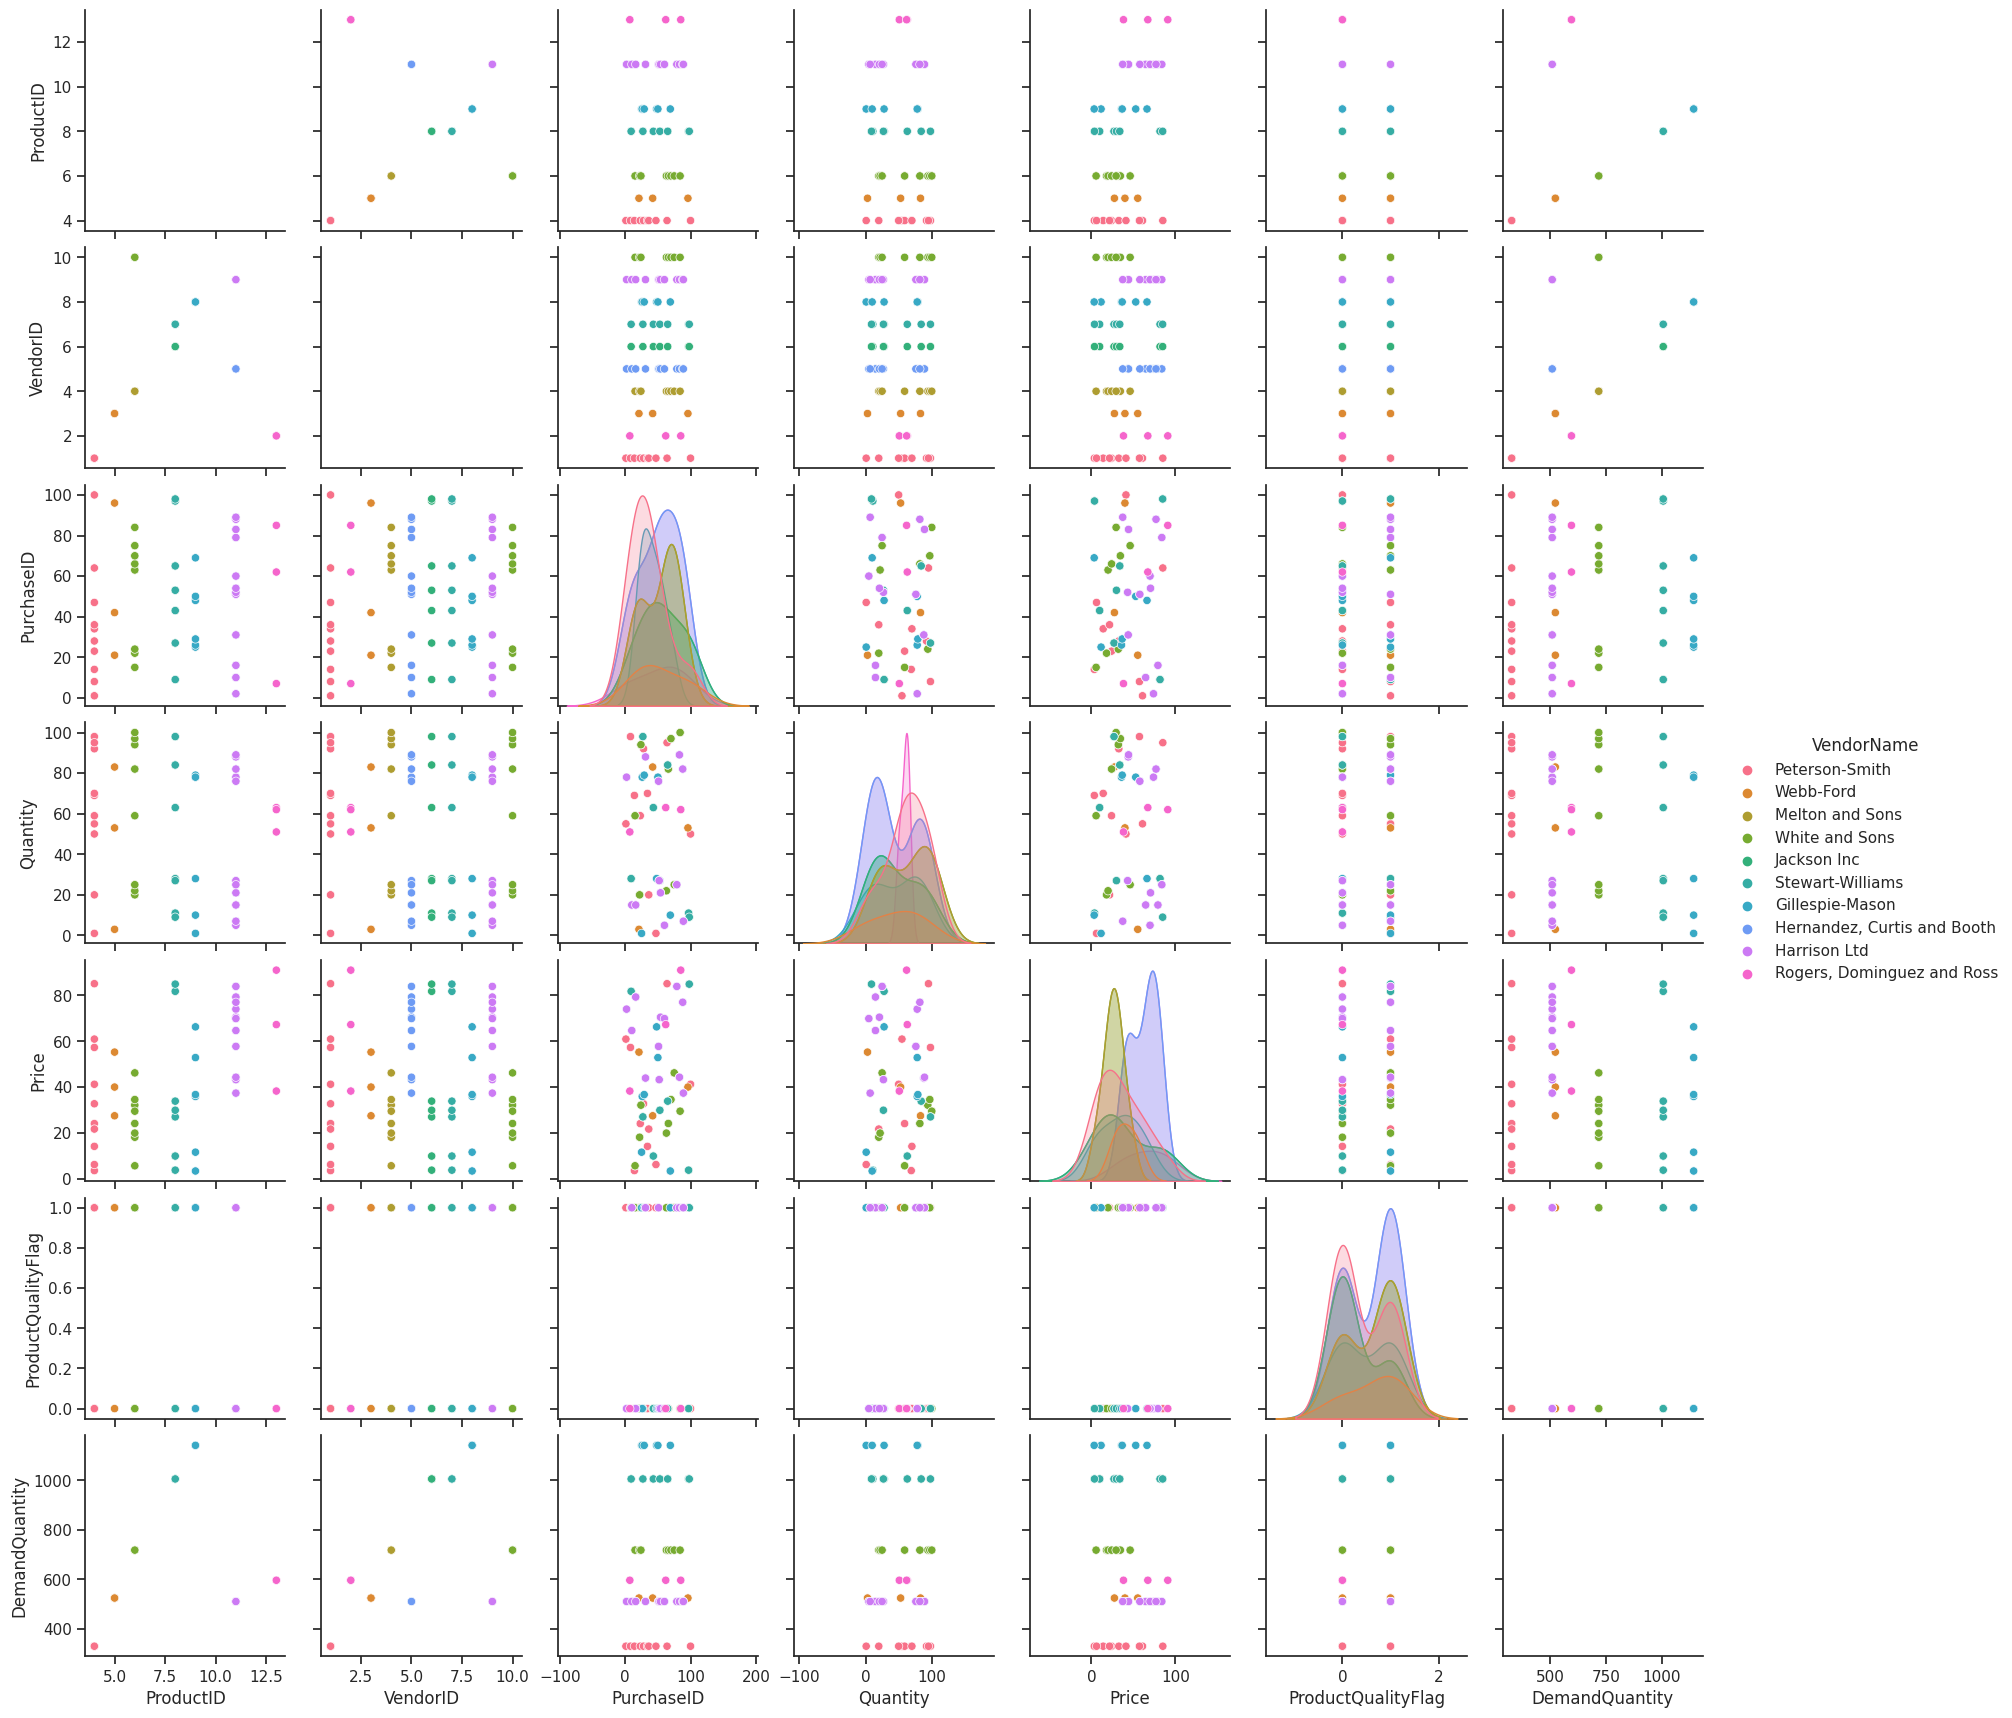

In [26]:
# Pairplot to visualize relationships between numerical variables
hue_variable = 'VendorName'
sns.set(style="ticks")
sns.pairplot(agg_df, hue=hue_variable, palette='husl')
plt.show()

#### Correlation Matrix

<ipython-input-27-d537aade7b35>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = agg_df.corr()


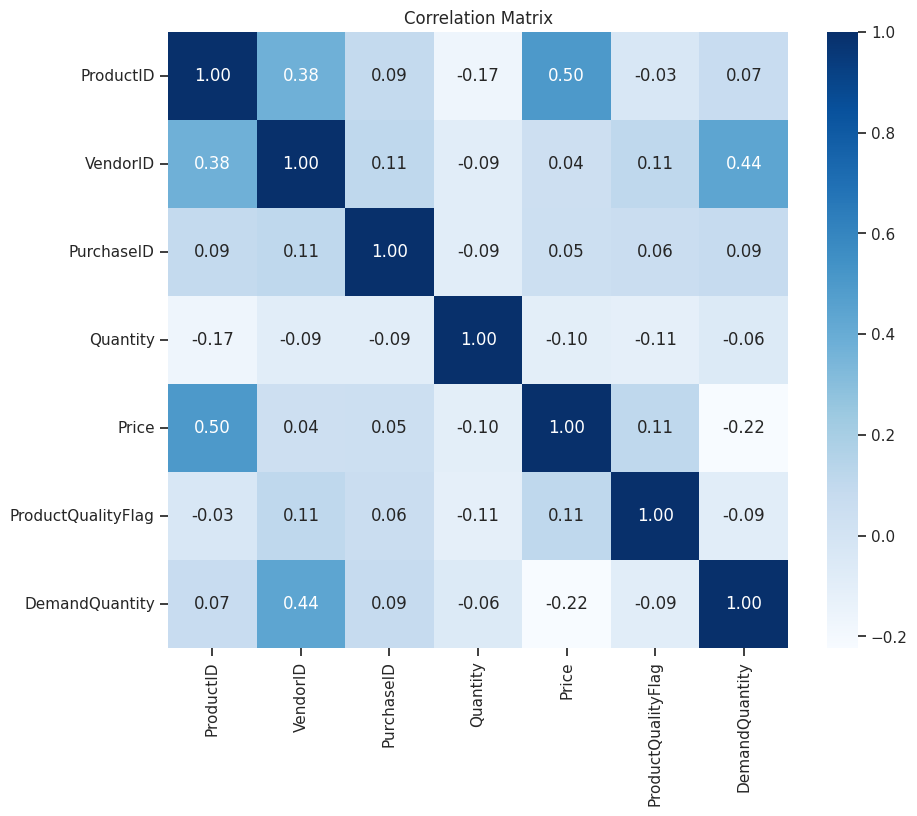

In [27]:

corr_matrix = agg_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### histograms to understand the distribution of continuous variables.

In [28]:
numerical_columns = agg_df.select_dtypes(include=['number'])
numerical_columns.shape

(76, 7)

In [29]:
numerical_columns.head(2)

,ProductID,VendorID,PurchaseID,Quantity,Price,ProductQualityFlag,DemandQuantity
0,4,1,1,55,60.95,1,329
1,4,1,8,98,57.30,1,329


In [30]:
# Define a list of colors for the histograms
colors = ['skyblue', 'salmon', 'lightgreen', 'yellow','lightcoral','orange']


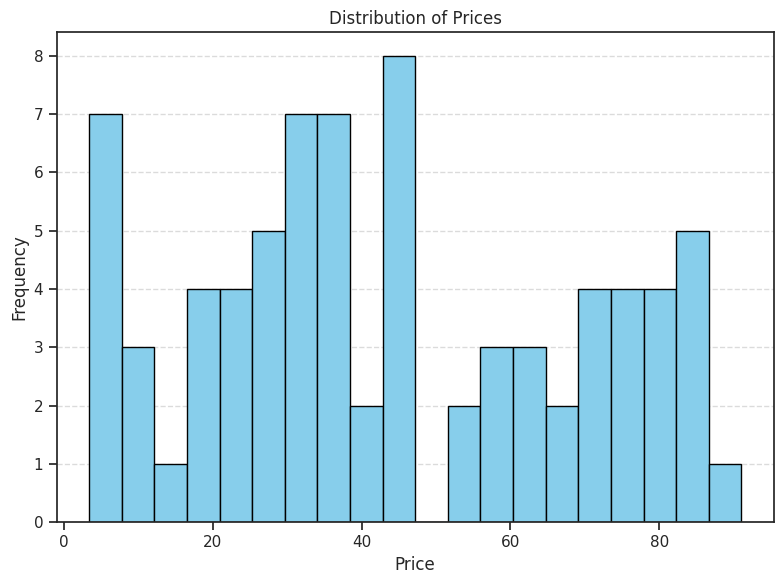

In [31]:
plt.figure(figsize=(8, 6))
plt.hist(agg_df['Price'], color='skyblue', edgecolor='black', bins=20)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

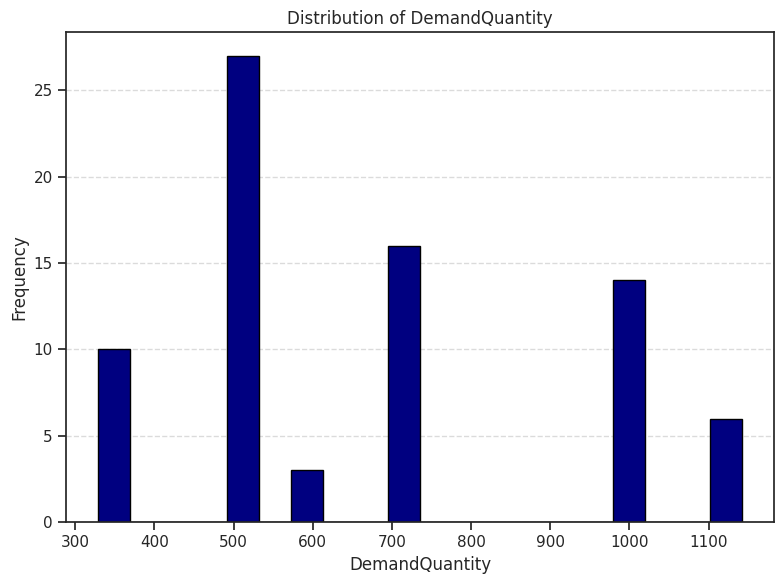

In [32]:
plt.figure(figsize=(8, 6))
plt.hist(agg_df['DemandQuantity'], color='navy', edgecolor='black', bins=20)
plt.title('Distribution of DemandQuantity')
plt.xlabel('DemandQuantity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

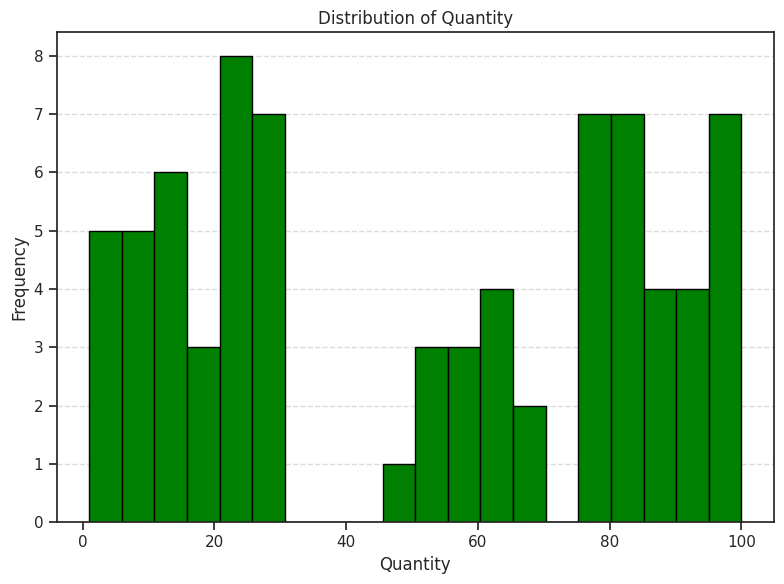

In [33]:
plt.figure(figsize=(8, 6))
plt.hist(agg_df['Quantity'], color='green', edgecolor='black', bins=20)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

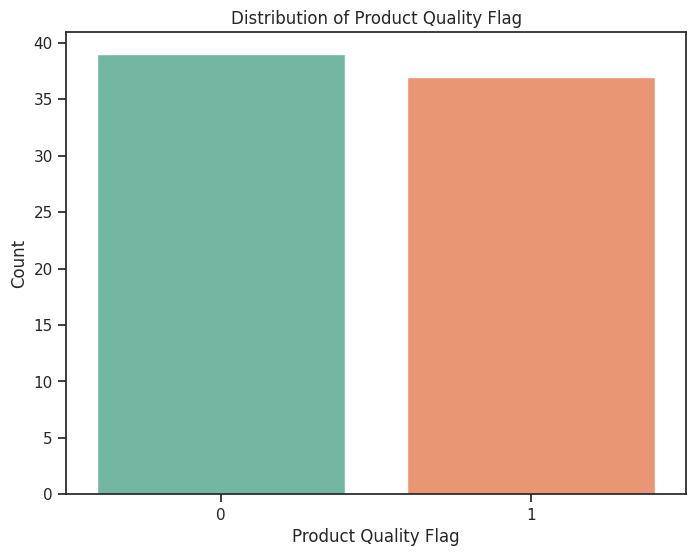

In [34]:
# sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a count plot for 'ProductQualityFlag'
sns.countplot(x='ProductQualityFlag', data=agg_df, palette='Set2')

plt.title('Distribution of Product Quality Flag')
plt.xlabel('Product Quality Flag')
plt.ylabel('Count')

plt.show()

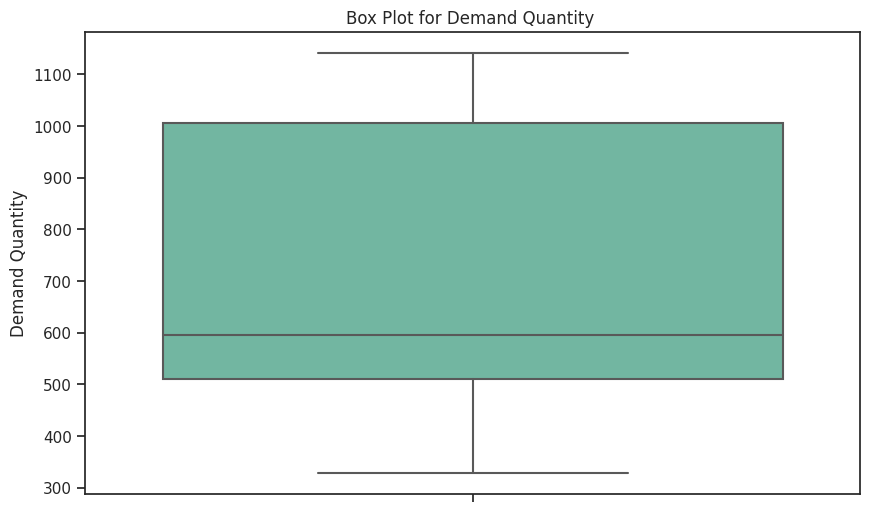

In [35]:
# sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(y='DemandQuantity', data=agg_df, palette='Set2')
# Add labels and title
plt.ylabel('Demand Quantity')
plt.title('Box Plot for Demand Quantity ')

# Show the plot
plt.show()

One outlier detected for Demand Quantity

In [36]:
Q1 = agg_df['DemandQuantity'].quantile(0.25)
Q3 = agg_df['DemandQuantity'].quantile(0.75)

In [37]:
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

In [38]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [39]:
# Detect outliers
outliers = agg_df[(agg_df['DemandQuantity'] < lower_bound) | (agg_df['DemandQuantity'] > upper_bound)]

In [40]:
outliers

,ProductID,VendorID,VendorName,ContactName,Email,Phone,Address,PurchaseID,PurchaseDate,Quantity,Price,ProductQualityFlag,ProductName,Category,DemandQuantity


In [41]:
outliers.shape

(0, 15)

In [42]:
filtered_data = agg_df[(agg_df['DemandQuantity'] >= lower_bound) & (agg_df['DemandQuantity'] <= upper_bound)].reset_index()
filtered_data.shape

(76, 16)

In [43]:
filtered_data.head(2)

,index,ProductID,VendorID,VendorName,ContactName,Email,Phone,Address,PurchaseID,PurchaseDate,Quantity,Price,ProductQualityFlag,ProductName,Category,DemandQuantity
0,0,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",1,2023-05-14,55,60.95,1,Broccoli,Vegetables,329
1,1,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",8,2023-06-18,98,57.30,1,Broccoli,Vegetables,329


In [44]:
filtered_df = filtered_data.iloc[: , 1:]
filtered_df.head()

,ProductID,VendorID,VendorName,ContactName,Email,Phone,Address,PurchaseID,PurchaseDate,Quantity,Price,ProductQualityFlag,ProductName,Category,DemandQuantity
0,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",1,2023-05-14,55,60.95,1,Broccoli,Vegetables,329
1,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",8,2023-06-18,98,57.30,1,Broccoli,Vegetables,329
2,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",14,2023-01-29,69,3.57,0,Broccoli,Vegetables,329
3,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",23,2022-12-09,59,24.08,0,Broccoli,Vegetables,329
4,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",28,2023-01-19,92,32.73,0,Broccoli,Vegetables,329


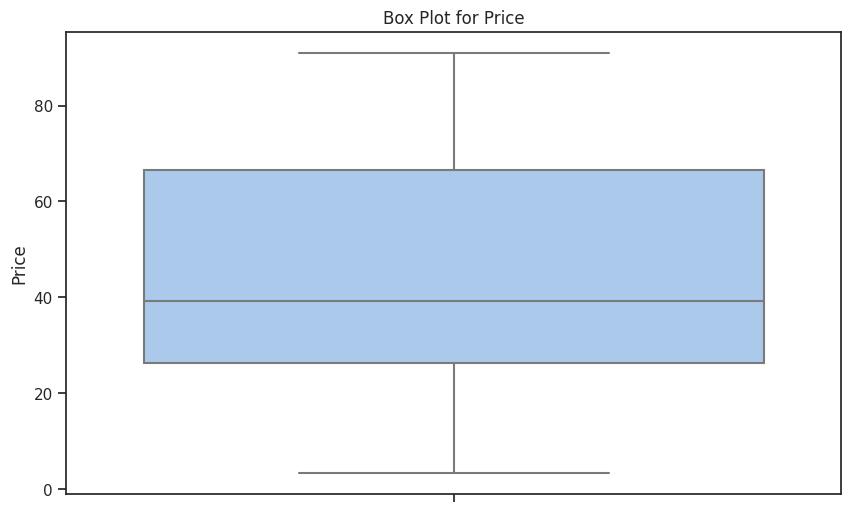

In [45]:
# sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(y='Price', data=filtered_df, palette='pastel')
# Add labels and title
plt.ylabel('Price')
plt.title('Box Plot for Price')

# Show the plot
plt.show()

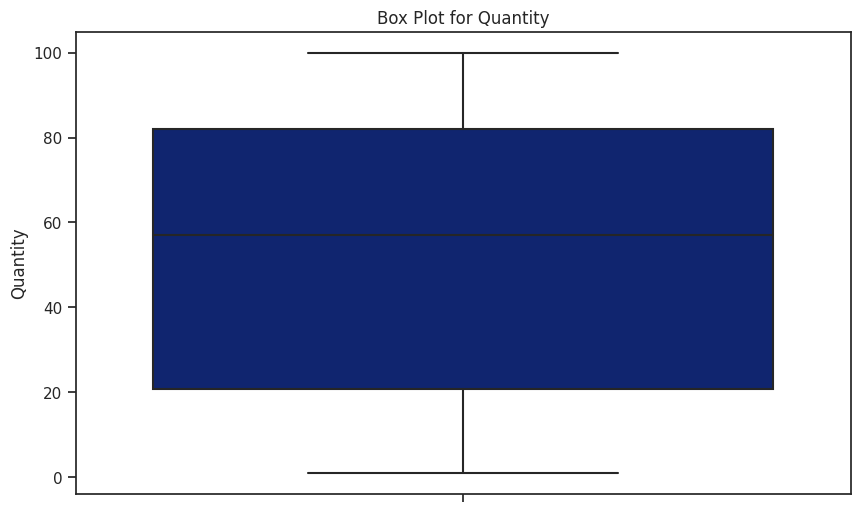

In [46]:
# sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(y='Quantity', data=filtered_df, palette='dark')
# Add labels and title
plt.ylabel('Quantity')
plt.title('Box Plot for Quantity')

# Show the plot
plt.show()

## Categorical Data

In [47]:
filtered_df

,ProductID,VendorID,VendorName,ContactName,Email,Phone,Address,PurchaseID,PurchaseDate,Quantity,Price,ProductQualityFlag,ProductName,Category,DemandQuantity
0,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",1,2023-05-14,55,60.95,1,Broccoli,Vegetables,329
1,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",8,2023-06-18,98,57.30,1,Broccoli,Vegetables,329
2,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",14,2023-01-29,69,3.57,0,Broccoli,Vegetables,329
3,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",23,2022-12-09,59,24.08,0,Broccoli,Vegetables,329
4,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",28,2023-01-19,92,32.73,0,Broccoli,Vegetables,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,11,9,Harrison Ltd,Erica Reynolds,pweeks@example.com,283-309-0232,547 Christopher Lake Suite 962\nLake Jasonshir...,88,2023-01-19,82,77.02,1,Milk,Dairy,510
72,11,9,Harrison Ltd,Erica Reynolds,pweeks@example.com,283-309-0232,547 Christopher Lake Suite 962\nLake Jasonshir...,89,2022-12-26,7,37.38,1,Milk,Dairy,510
73,13,2,"Rogers, Dominguez and Ross",Isaac Booth,bsantiago@example.org,+1-358-995-0587x274,USCGC Mcknight\nFPO AA 34773,7,2023-04-30,51,38.28,0,Egg,Dairy,596
74,13,2,"Rogers, Dominguez and Ross",Isaac Booth,bsantiago@example.org,+1-358-995-0587x274,USCGC Mcknight\nFPO AA 34773,62,2023-02-20,63,67.27,0,Egg,Dairy,596


In [48]:
filtered_df.dtypes

ProductID                      int64
VendorID                       int64
VendorName                    object
ContactName                   object
Email                         object
Phone                         object
Address                       object
PurchaseID                     int64
PurchaseDate          datetime64[ns]
Quantity                       int64
Price                        float64
ProductQualityFlag             int64
ProductName                   object
Category                      object
DemandQuantity                 int64
dtype: object

In [49]:
product_purchase_quantity = filtered_df.groupby(['ProductName', 'PurchaseDate'])['Quantity'].sum().reset_index()

In [50]:
product_purchase_quantity.head()

,ProductName,PurchaseDate,Quantity
0,Beef,2023-01-19,1
1,Beef,2023-02-03,78
2,Beef,2023-06-06,78
3,Beef,2023-06-19,79
4,Beef,2023-07-11,10


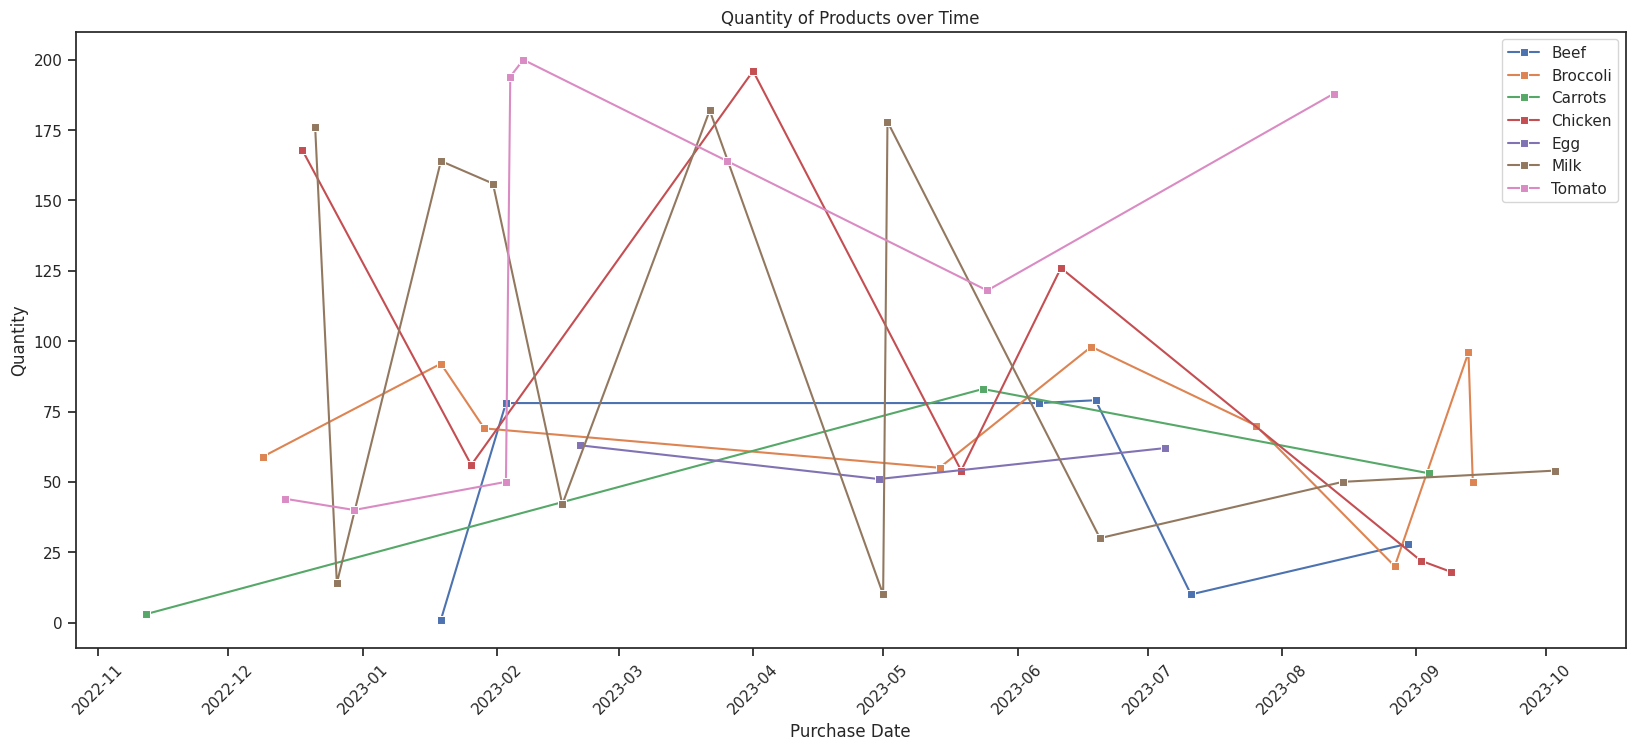

In [51]:
# Get the unique ProductIDs
unique_product_ids = product_purchase_quantity['ProductName'].unique()

# Create a time series plot for each product
plt.figure(figsize=(20, 8))
for product_id in unique_product_ids:
    product_data = product_purchase_quantity[product_purchase_quantity['ProductName'] == product_id]

    # Plot the time series for the product
    sns.lineplot(x='PurchaseDate', y='Quantity', data=product_data, label=f'{product_id}', marker='s')

plt.title('Quantity of Products over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(loc='upper right')
plt.show()

Relationship between Product Name,PurchaseDate and Price

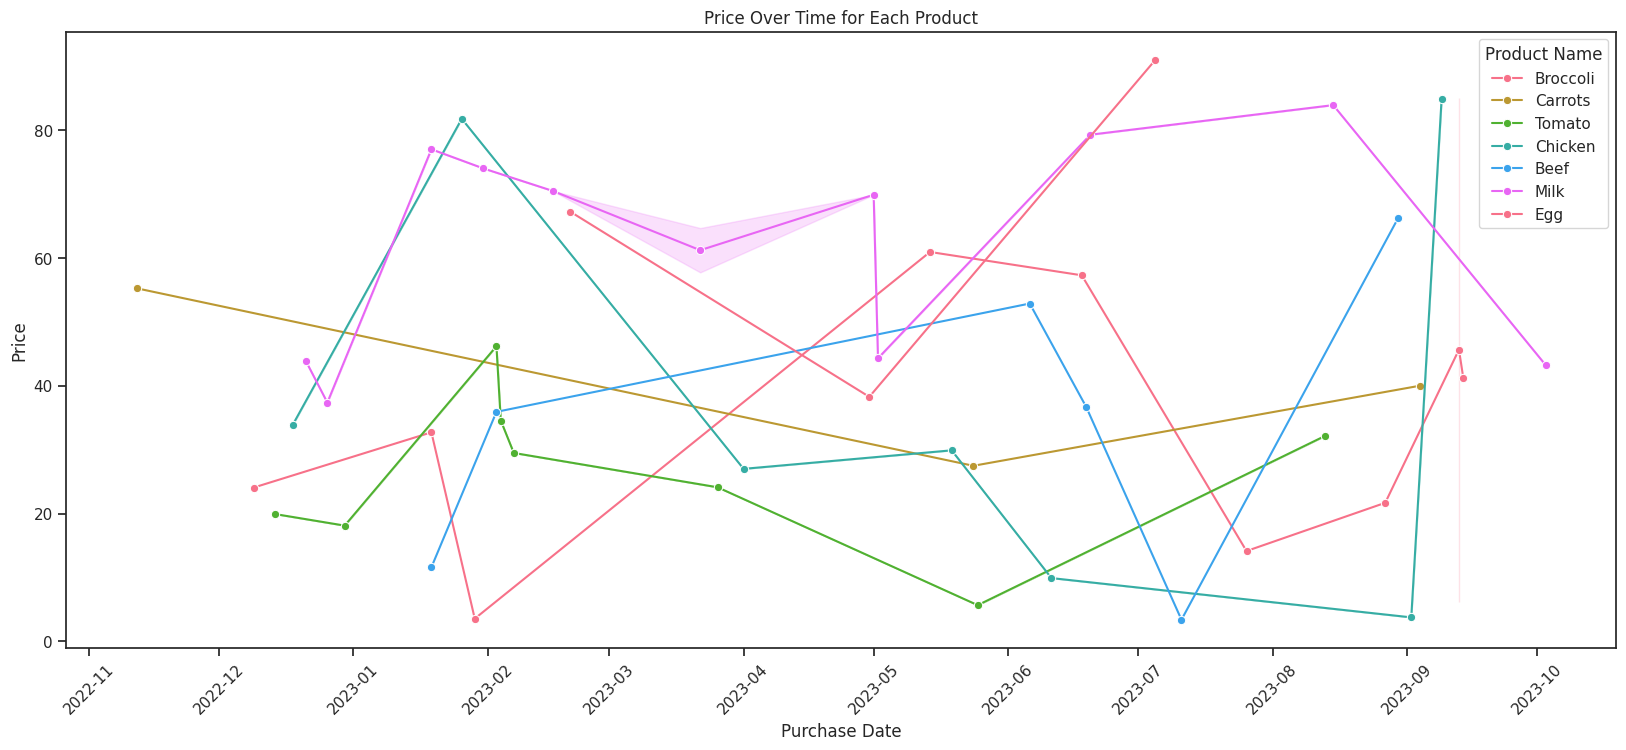

In [52]:
plt.figure(figsize=(20, 8))
# sns.set(style='whitegrid')
sns.set_palette('husl')  # Set the color palette

# Loop through unique ProductIDs
unique_product_ids = filtered_df['ProductName'].unique()
for product_id in unique_product_ids:
    product_data = filtered_df[filtered_data['ProductName'] == product_id]

    # Create a line plot for the product
    sns.lineplot(x='PurchaseDate', y='Price', data=product_data, label=f'{product_id}', marker='o')

plt.title('Price Over Time for Each Product')
plt.xlabel('Purchase Date')
plt.ylabel('Price')
plt.legend(loc='upper right', title='Product Name')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [53]:
vendor_purchase_product = filtered_df.groupby(['VendorName', 'PurchaseDate'])['ProductName'].sum().reset_index()
vendor_purchase_product.head(2)

,VendorName,PurchaseDate,ProductName
0,Gillespie-Mason,2023-01-19,Beef
1,Gillespie-Mason,2023-02-03,Beef


In [54]:
# Group data by 'VendorName' and 'ProductName' and count the occurrences
vendor_product_counts = filtered_df.groupby(['VendorName', 'ProductName']).size().reset_index(name='PurchaseCount')
# Sort the values by 'VendorName' and 'PurchaseCount' in descending order
vendor_product_counts = vendor_product_counts.sort_values(['VendorName', 'PurchaseCount'], ascending=[True, False])

In [55]:
vendor_product_counts

,VendorName,ProductName,PurchaseCount
0,Gillespie-Mason,Beef,6
1,Harrison Ltd,Milk,12
2,"Hernandez, Curtis and Booth",Milk,12
3,Jackson Inc,Chicken,7
4,Melton and Sons,Tomato,8
5,Peterson-Smith,Broccoli,10
6,"Rogers, Dominguez and Ross",Egg,3
7,Stewart-Williams,Chicken,7
8,Webb-Ford,Carrots,3
9,White and Sons,Tomato,8


In [56]:
pivot_table = vendor_product_counts.pivot('VendorName', 'ProductName', 'PurchaseCount')

<ipython-input-56-9823d0e3772d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = vendor_product_counts.pivot('VendorName', 'ProductName', 'PurchaseCount')


In [57]:
pivot_table

ProductName,Beef,Broccoli,Carrots,Chicken,Egg,Milk,Tomato
VendorName,,,,,,,
Gillespie-Mason,6.0,NaN,NaN,NaN,NaN,NaN,NaN
Harrison Ltd,NaN,NaN,NaN,NaN,NaN,12.0,NaN
"Hernandez, Curtis and Booth",NaN,NaN,NaN,NaN,NaN,12.0,NaN
Jackson Inc,NaN,NaN,NaN,7.0,NaN,NaN,NaN
Melton and Sons,NaN,NaN,NaN,NaN,NaN,NaN,8.0
Peterson-Smith,NaN,10.0,NaN,NaN,NaN,NaN,NaN
"Rogers, Dominguez and Ross",NaN,NaN,NaN,NaN,3.0,NaN,NaN
Stewart-Williams,NaN,NaN,NaN,7.0,NaN,NaN,NaN
Webb-Ford,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [58]:
pivot_table = pivot_table.replace(np.nan, 0)

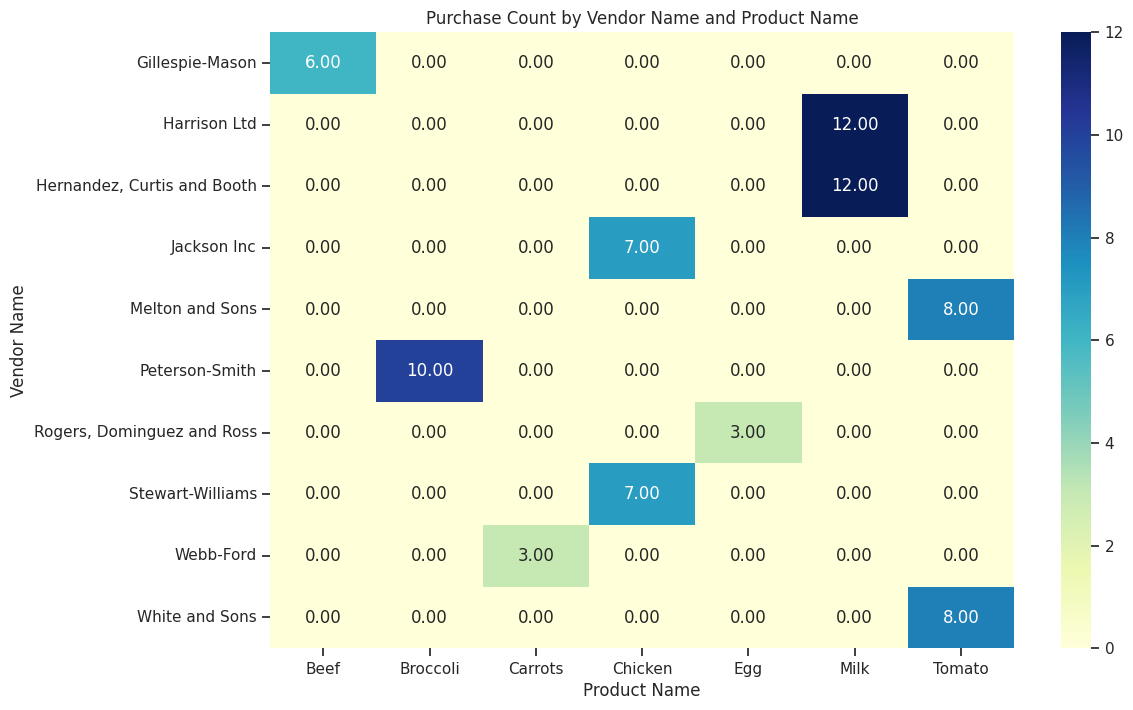

In [59]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Purchase Count by Vendor Name and Product Name')
plt.xlabel('Product Name')
plt.ylabel('Vendor Name')
plt.show()

In [60]:
filtered_df.columns

Index(['ProductID', 'VendorID', 'VendorName', 'ContactName', 'Email', 'Phone',
       'Address', 'PurchaseID', 'PurchaseDate', 'Quantity', 'Price',
       'ProductQualityFlag', 'ProductName', 'Category', 'DemandQuantity'],
      dtype='object')

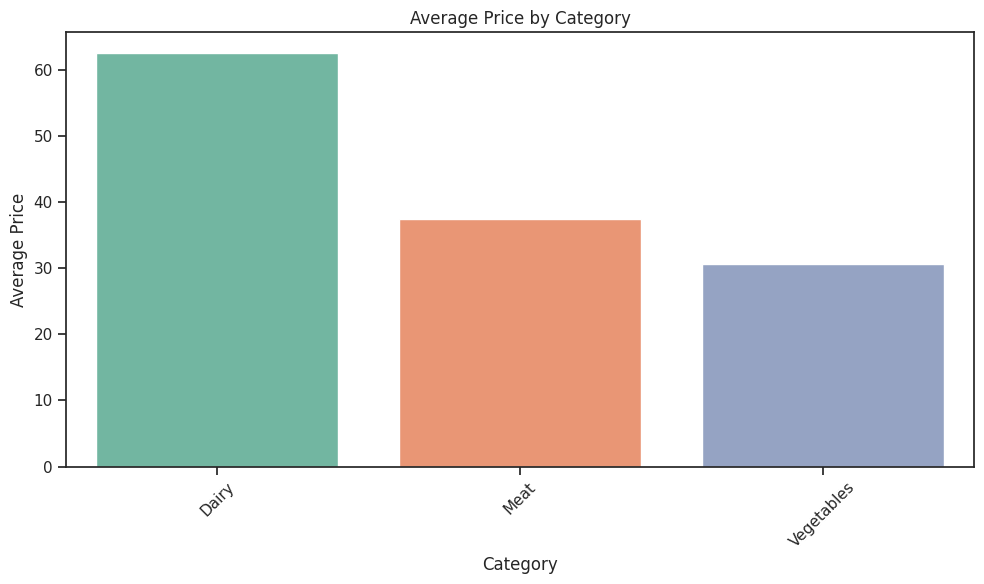

In [61]:
# Calculate the average price for each category
avg_price_by_category = filtered_df.groupby('Category')['Price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Price', data=avg_price_by_category, palette='Set2')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Average Price by Category')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

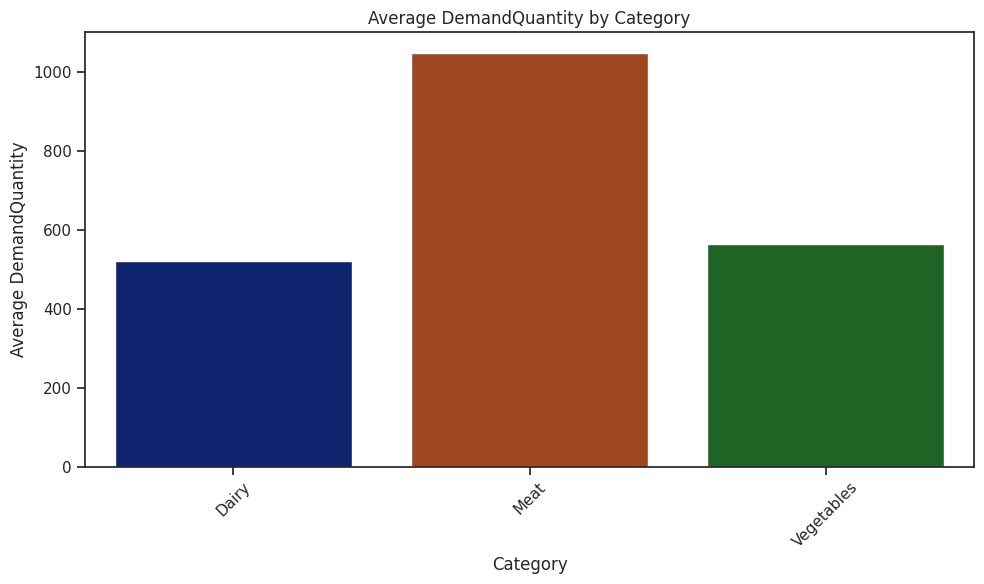

In [62]:
avg_dmdqty_by_category = filtered_df.groupby('Category')['DemandQuantity'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='DemandQuantity', data=avg_dmdqty_by_category, palette='dark')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Average DemandQuantity')
plt.title('Average DemandQuantity by Category')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#4.Choose appropriate Artificial Intelligence or Machine Learning algorithms for correlating information and generating reports

Transforming of Purchase date

In [63]:
filtered_df['PurchaseDate'].unique()

array(['2023-05-14T00:00:00.000000000', '2023-06-18T00:00:00.000000000',
       '2023-01-29T00:00:00.000000000', '2022-12-09T00:00:00.000000000',
       '2023-01-19T00:00:00.000000000', '2023-07-26T00:00:00.000000000',
       '2023-08-27T00:00:00.000000000', '2023-09-13T00:00:00.000000000',
       '2023-09-14T00:00:00.000000000', '2022-11-12T00:00:00.000000000',
       '2023-05-24T00:00:00.000000000', '2023-09-04T00:00:00.000000000',
       '2023-05-25T00:00:00.000000000', '2022-12-30T00:00:00.000000000',
       '2023-08-13T00:00:00.000000000', '2022-12-14T00:00:00.000000000',
       '2023-03-26T00:00:00.000000000', '2023-02-04T00:00:00.000000000',
       '2023-02-03T00:00:00.000000000', '2023-02-07T00:00:00.000000000',
       '2023-01-26T00:00:00.000000000', '2023-04-01T00:00:00.000000000',
       '2023-06-11T00:00:00.000000000', '2023-05-19T00:00:00.000000000',
       '2022-12-18T00:00:00.000000000', '2023-09-02T00:00:00.000000000',
       '2023-09-09T00:00:00.000000000', '2023-06-19

In [64]:
filtered_df['PurchaseDate'] = pd.to_datetime(filtered_df['PurchaseDate'])

In [65]:
filtered_df['Year'] = filtered_df['PurchaseDate'].dt.year
filtered_df['Month'] = filtered_df['PurchaseDate'].dt.month
filtered_df['Day'] = filtered_df['PurchaseDate'].dt.day
filtered_df['DayOfWeek'] = filtered_df['PurchaseDate'].dt.dayofweek


In [66]:
filtered_df['DaysSinceFirstPurchase'] = (filtered_df['PurchaseDate'] - filtered_df['PurchaseDate'].min()).dt.days

In [67]:
filtered_df.head()

,ProductID,VendorID,VendorName,ContactName,Email,Phone,Address,PurchaseID,PurchaseDate,Quantity,Price,ProductQualityFlag,ProductName,Category,DemandQuantity,Year,Month,Day,DayOfWeek,DaysSinceFirstPurchase
0,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",1,2023-05-14,55,60.95,1,Broccoli,Vegetables,329,2023,5,14,6,183
1,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",8,2023-06-18,98,57.30,1,Broccoli,Vegetables,329,2023,6,18,6,218
2,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",14,2023-01-29,69,3.57,0,Broccoli,Vegetables,329,2023,1,29,6,78
3,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",23,2022-12-09,59,24.08,0,Broccoli,Vegetables,329,2022,12,9,4,27
4,4,1,Peterson-Smith,Johnny Mendez,srobinson@example.org,206-778-2047x2649,"0974 Michael Junctions Suite 320\nJessicaview,...",28,2023-01-19,92,32.73,0,Broccoli,Vegetables,329,2023,1,19,3,68


In [68]:
filtered_df.columns

Index(['ProductID', 'VendorID', 'VendorName', 'ContactName', 'Email', 'Phone',
       'Address', 'PurchaseID', 'PurchaseDate', 'Quantity', 'Price',
       'ProductQualityFlag', 'ProductName', 'Category', 'DemandQuantity',
       'Year', 'Month', 'Day', 'DayOfWeek', 'DaysSinceFirstPurchase'],
      dtype='object')

#### Encoding the categorical variables

In [69]:
# Encode categorical variables
new_data = pd.get_dummies(filtered_df, columns=['VendorName', 'ProductName', 'Category'])

In [70]:
# Split data into features and target
X = new_data.drop(['ProductQualityFlag', 'ContactName', 'Email', 'Phone', 'Address','ProductID','VendorID','PurchaseID','PurchaseDate','Year','Month','Day','DayOfWeek'], axis=1)
y = new_data['ProductQualityFlag']

In [71]:
X.head()

,Quantity,Price,DemandQuantity,DaysSinceFirstPurchase,VendorName_Gillespie-Mason,VendorName_Harrison Ltd,"VendorName_Hernandez, Curtis and Booth",VendorName_Jackson Inc,VendorName_Melton and Sons,VendorName_Peterson-Smith,...,ProductName_Beef,ProductName_Broccoli,ProductName_Carrots,ProductName_Chicken,ProductName_Egg,ProductName_Milk,ProductName_Tomato,Category_Dairy,Category_Meat,Category_Vegetables
0,55,60.95,329,183,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,98,57.30,329,218,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,69,3.57,329,78,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,59,24.08,329,27,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,92,32.73,329,68,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [72]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Model selection and training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [75]:
print(f'Accuracy: {accuracy:.2f}')
print(report)

Accuracy: 0.50
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.80      0.36      0.50        11

    accuracy                           0.50        16
   macro avg       0.58      0.58      0.50        16
weighted avg       0.66      0.50      0.50        16



In [76]:
# feature importances
feature_importances = model.feature_importances_
feature_importances

array([0.23727391, 0.22384019, 0.02714007, 0.26801985, 0.00599955,
       0.01520628, 0.00499505, 0.00599071, 0.01119506, 0.01478036,
       0.00322169, 0.00883408, 0.00118243, 0.03640966, 0.00427702,
       0.01136931, 0.00167171, 0.01962508, 0.00882444, 0.01264527,
       0.03274305, 0.01519111, 0.01008985, 0.01947429])

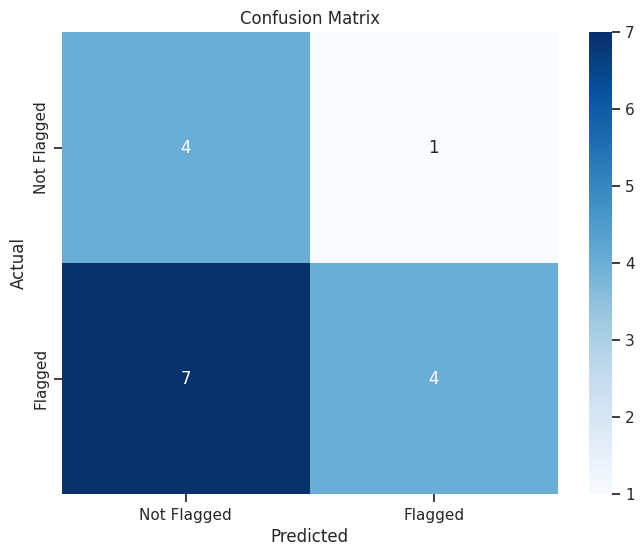

In [77]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Flagged', 'Flagged'], yticklabels=['Not Flagged', 'Flagged'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()